In [1]:
import glob 
from collections import defaultdict
from util import kitti_label_file_parser
import matplotlib.pyplot as plt

LABEL_DIR = "/home/lab530/KenYu/kitti/training/label_2/"


Number of total ground trues = 51865
Categories: 
Van: 2914
Car: 28742
Misc: 973
DontCare: 11295
Truck: 1094
Pedestrian: 4487
Cyclist: 1627
Tram: 511
Person_sitting: 222
Truncated Objects:
Number of truncated object = 4067, 7.84%
Occluded objects:
1: 8184  (28.47%)
0: 13457  (46.82%)
3: 928  (3.23%)
2: 6173  (21.48%)
Dimension: 
Average height = 1.526
Average width  = 1.629
Average length = 3.884
Average height = 1.71


(array([ 12.,  58., 161., 214., 347., 287., 364., 394., 501., 496., 533.,
        550., 530., 529., 587., 572., 586., 592., 559., 573., 607., 571.,
        637., 610., 596., 582., 614., 708., 608., 577., 535., 515., 575.,
        514., 524., 493., 454., 498., 506., 473., 457., 409., 401., 420.,
        412., 341., 349., 367., 326., 289., 277., 273., 270., 301., 276.,
        275., 243., 203., 203., 189., 251., 220., 205., 150., 132., 135.,
        127., 118., 122.,  99., 108.,  92.,  91.,  80.,  79.,  67.,  55.,
         73.,  60.,  61.,  69.,  50.,  62.,  54.,  38.,  44.,  40.,  35.,
         26.,  24.,  18.,   9.,  14.,   6.,   3.,   0.,   1.,   0.,   0.,
          1.]),
 array([-0.18  ,  0.6836,  1.5472,  2.4108,  3.2744,  4.138 ,  5.0016,
         5.8652,  6.7288,  7.5924,  8.456 ,  9.3196, 10.1832, 11.0468,
        11.9104, 12.774 , 13.6376, 14.5012, 15.3648, 16.2284, 17.092 ,
        17.9556, 18.8192, 19.6828, 20.5464, 21.41  , 22.2736, 23.1372,
        24.0008, 24.8644, 25.728 ,

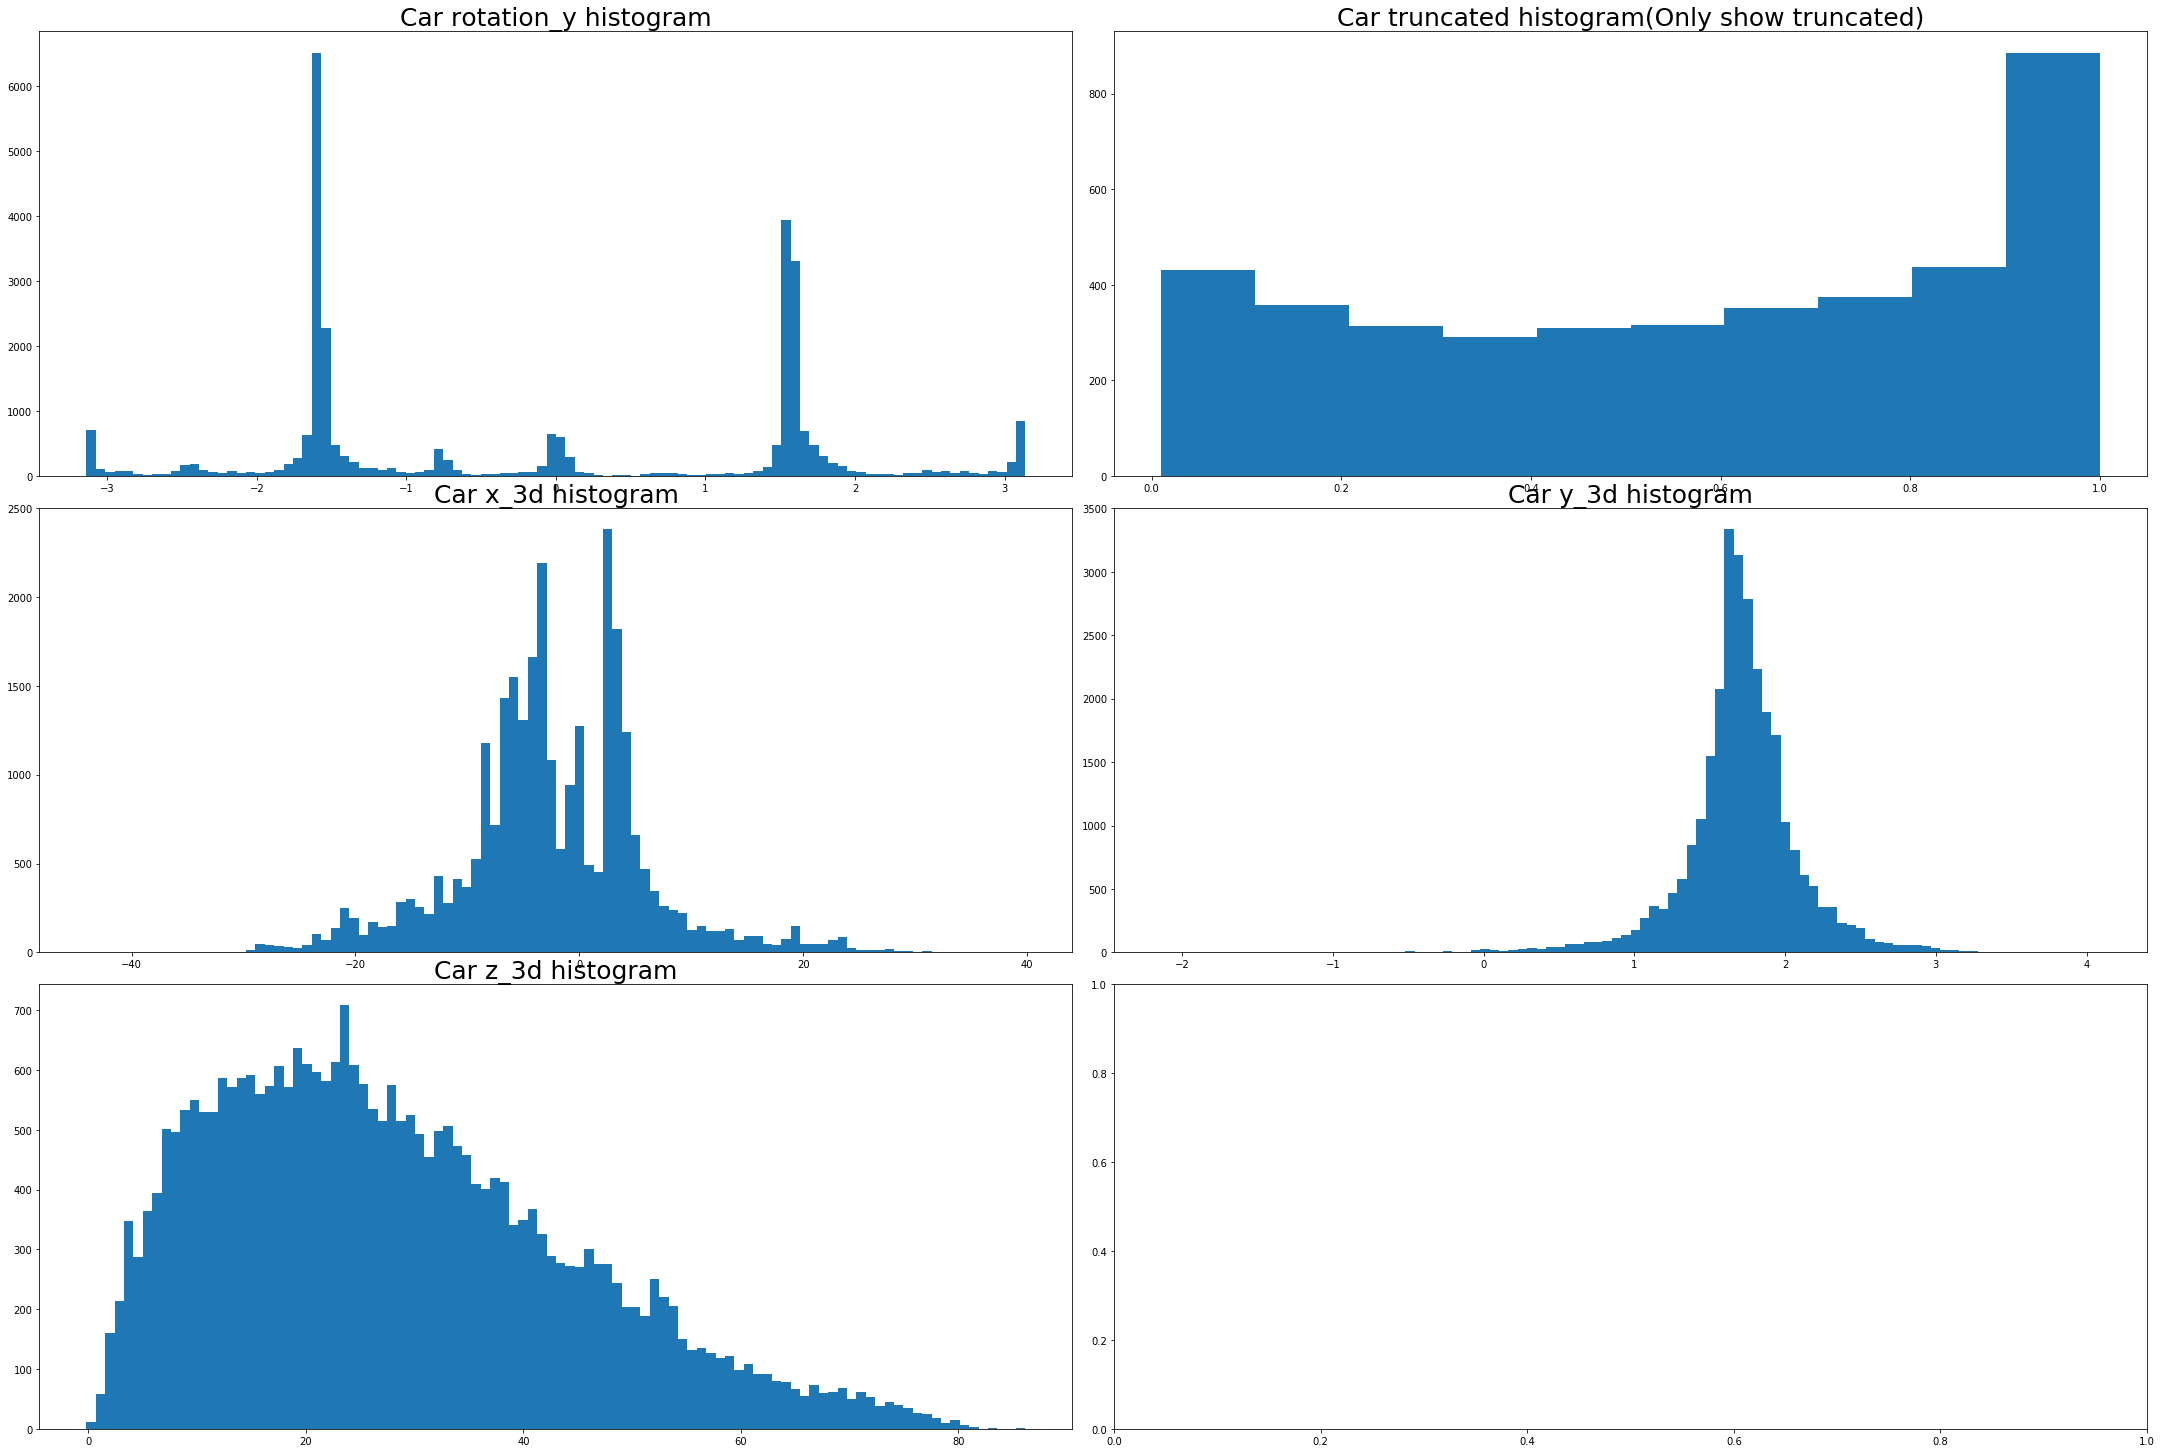

In [2]:
objs = []
for fn in glob.glob(LABEL_DIR + "*.txt"):
    objs += kitti_label_file_parser(fn)
print(f"Number of total ground trues = {len(objs)}")
print("=====================================")

# Show category
print("Categories: ")
cls_dict = defaultdict(int)
for obj in objs:
    cls_dict[obj.category] += 1

for cls in cls_dict:
    print(f"{cls}: {cls_dict[cls]}")
print("=====================================")

# Show truncated objects
print("Truncated Objects:")
N_BIN_TRUNCATED = 10
x_truncated = []
not_truncated_count = 0 
for obj in objs:
    if obj.category == "Car":
        if obj.truncated == 0.0: # Not truncated
            not_truncated_count += 1
        else:
            x_truncated.append(obj.truncated)
print(f"Number of truncated object = {len(x_truncated)}, {round(100*len(x_truncated)/len(objs), 2)}%")

print("=====================================")
print("Occluded objects:")
occ_dict = defaultdict(int)
for obj in objs:
    if obj.category == "Car":
        occ_dict[obj.occluded] += 1
for i in occ_dict:
    print(f"{i}: {occ_dict[i]}  ({round(100*occ_dict[i]/cls_dict['Car'],2)}%)")
print("=====================================")
print("Dimension: ")
avg_h, avg_w, avg_l  = 0, 0, 0

for obj in objs:
    if obj.category == "Car":
        avg_h += obj.h / cls_dict['Car']
        avg_w += obj.w / cls_dict['Car']
        avg_l += obj.l / cls_dict['Car']
print(f"Average height = {round(avg_h, 3)}")
print(f"Average width  = {round(avg_w, 3)}")
print(f"Average length = {round(avg_l, 3)}")

print("=====================================")
avg_y_3d = 0
for obj in objs:
    if obj.category == "Car":
        avg_y_3d += obj.y_3d / cls_dict['Car']
print(f"Average height = {round(avg_y_3d, 3)}")

# Show rotation_y histogram
N_BIN_ROTATION_Y = 100
x_rotation_y = []
for obj in objs:
    if obj.category == "Car":
        x_rotation_y.append(obj.rot_y)

# Show x_3d 
N_BIN_X_3D = 100
x_x_3d = []
for obj in objs:
    if obj.category == "Car":
        x_x_3d.append(obj.x_3d)

# Show y_3d 
N_BIN_Y_3D = 100
x_y_3d = []
for obj in objs:
    if obj.category == "Car":
        x_y_3d.append(obj.y_3d)

# Show z_3d 
N_BIN_Z_3D = 100
x_z_3d = []
for obj in objs:
    if obj.category == "Car":
        x_z_3d.append(obj.z_3d)


# Draw histogram
fig, ax = plt.subplots(3, 2, figsize=(30, 20))
fig.set_facecolor('white')
fig.tight_layout()

ax[0, 0].set_title("Car rotation_y histogram", fontsize=25)
ax[0, 0].hist(x_rotation_y, bins=N_BIN_ROTATION_Y)
ax[0, 1].set_title("Car truncated histogram(Only show truncated)", fontsize=25)
ax[0, 1].hist(x_truncated, bins=N_BIN_TRUNCATED)
ax[1, 0].set_title("Car x_3d histogram", fontsize=25)
ax[1, 0].hist(x_x_3d, bins=N_BIN_X_3D)
ax[1, 1].set_title("Car y_3d histogram", fontsize=25)
ax[1, 1].hist(x_y_3d, bins=N_BIN_Y_3D)
ax[2, 0].set_title("Car z_3d histogram", fontsize=25)
ax[2, 0].hist(x_z_3d, bins=N_BIN_Z_3D)


## Calcualate alpha angle


In [9]:
import math
for obj in objs:
    if obj.category == "Car":
        x_x_3d.append(obj.x_3d)
        alpha_my = obj.rot_y + math.atan2(obj.z_3d, obj.x_3d) - math.pi/2

        # Constraint alpha_my in [-pi, pi]
        if alpha_my > math.pi: alpha_my -= 2*math.pi
        elif alpha_my < -math.pi: alpha_my += 2*math.pi

        if abs(alpha_my - obj.alpha) > 0.3:
            print(obj.alpha)
            print(alpha_my)

-3.14
3.138933319966662
3.14
-3.1404460190377588
-3.14
3.13597033102729
3.13
-3.1377173578538073
-3.07
3.1221185126271536
